## Investigating Which "Kinds" of Players Would Likely Contribute a Large Amount of Data ##

## Introduction

Minecraft is an interactive, open-world electronic game in which players explore a virtual world composed of 3D blocks. It is extremely popular amongst children and teenagers, with it being the second most sold video game in history (Johnston). Because the game allows players to interact freely in an open-world environment, their engagement patterns can differ substantially, with different factors that could influence their playing behaviour. From a researcher’s perspective, maximizing player activity would generate more data for analysis. Thus, we have chosen to investigate the research question: Can player experience level and age be used to predict the played hours of a player? It is likely that age and experience could play a factor in interest, as younger players typically have more leisure time, while experienced players may have greater motivation or familiarity with the game system, both of which could contribute to longer play durations. Understanding these relationships can help server developers create more targeted strategies to improve player retention. To address this question, we have chosen to investigate the dataset players.csv, which includes roughly 200 observations. The variables are described below: 


- `experience`: a categorical variable that describes a player's experience into different levels - amateur, beginner, regular, veteran, and pro
- `subscribe`: a logical variable that tells us whether or not the player is subscribed to a Minecraft Youtuber
- `hashedEmail`: a character variable that includes the player's email, which has been hashed through an algorithm to preserve anonymity for the players
- `played_hours`: a numerical variable that includes the amount of time in hours a player has spent playing Minecraft in the server
- `name`: a character variable that includes the player's name
- `gender`: a character variable that includes the player's gender
- `Age`: a numerical variable that includes the player's age, in years

This dataset allows us to explore how these demographic factors and gaming experience relate to server engagement. We will focus on analyzing the data through k-NN regression, in which we will convert the necessary variables to the right variable type, standardize them, find the best k-value, and attempt to model the data to investigate the potential relationship between our variables by calculating the RMSE test error.


## Methods and Results

To begin, we will first begin by loading the necessary packages, loading the dataset, then cleaning the data. This ensures that our column names are unique and free of capital characters to make data manipulation easier. 

In [1]:
library(tidyverse)
library(tidymodels)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
players_clean <- players |> 
    clean_names()
head(players_clean)
tail(players_clean)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


We can then select our variables we will be investigating, filter by `age`= NA, and `played_hours` = 0, and convert the variable `experience` to a numeric variable, in which each experience level will correspond with a number from 1-5, from least experience to greatest experience.  We filter for NA and 0's as these observations would either yield errors when creating the model, or skew regression calculations.

In [4]:
players_ds <- players_clean|>
            select(experience, age, played_hours) |>
            filter(age != "NA", played_hours != "0" ) |>
            mutate(experience = factor(experience, 
                             levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))) |>
            mutate(experience = as.numeric(experience))
head(players_ds)
tail(players_ds)

experience,age,played_hours
<dbl>,<dbl>,<dbl>
5,9,30.3
4,17,3.8
2,21,0.7
3,21,0.1
2,47,0.1
4,23,1.6


experience,age,played_hours
<dbl>,<dbl>,<dbl>
2,22,32.0
5,17,1.7
3,18,0.1
4,44,0.1
4,22,0.3
2,17,2.3


We then plot a distribution of each variable.

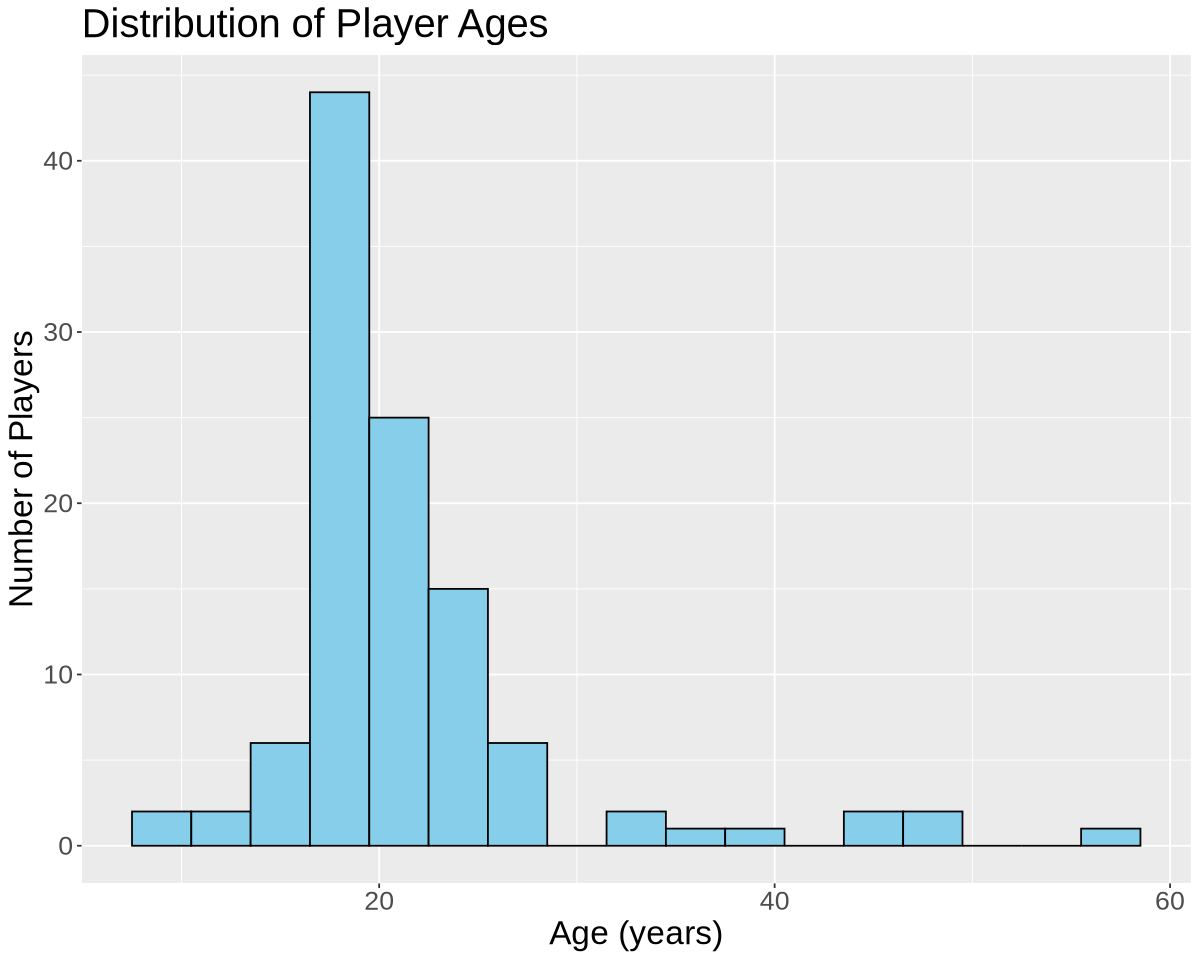

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_plot <- players_ds |> 
    ggplot(aes(x=age)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Age (years)",
        y="Number of Players",
        title="Distribution of Player Ages"
    ) +
    theme(text = element_text(size=20))
age_plot

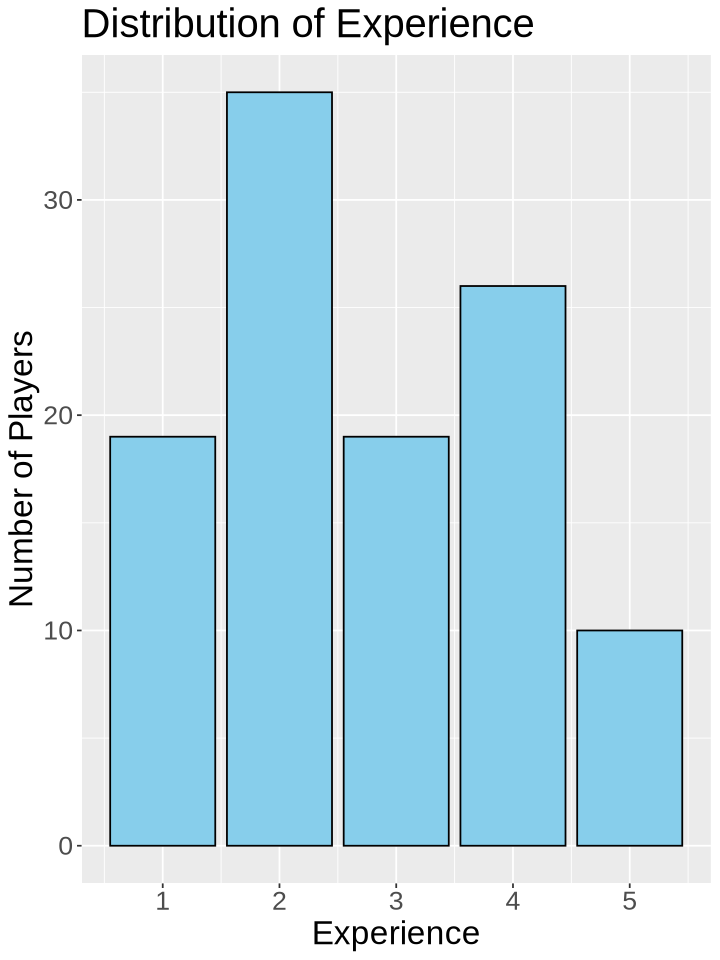

In [6]:
options(repr.plot.width = 6, repr.plot.height = 8)
players_experience_plot <- players_ds |> 
    group_by(experience) |>
    summarize(count = n()) |>
    ggplot(aes(x=experience, y=count)) +
    geom_bar(stat="identity", fill = "skyblue", color = "black") +
    labs(
        x="Experience",
        y="Number of Players",
        title="Distribution of Experience"
    ) +
    theme(text = element_text(size=20))
players_experience_plot

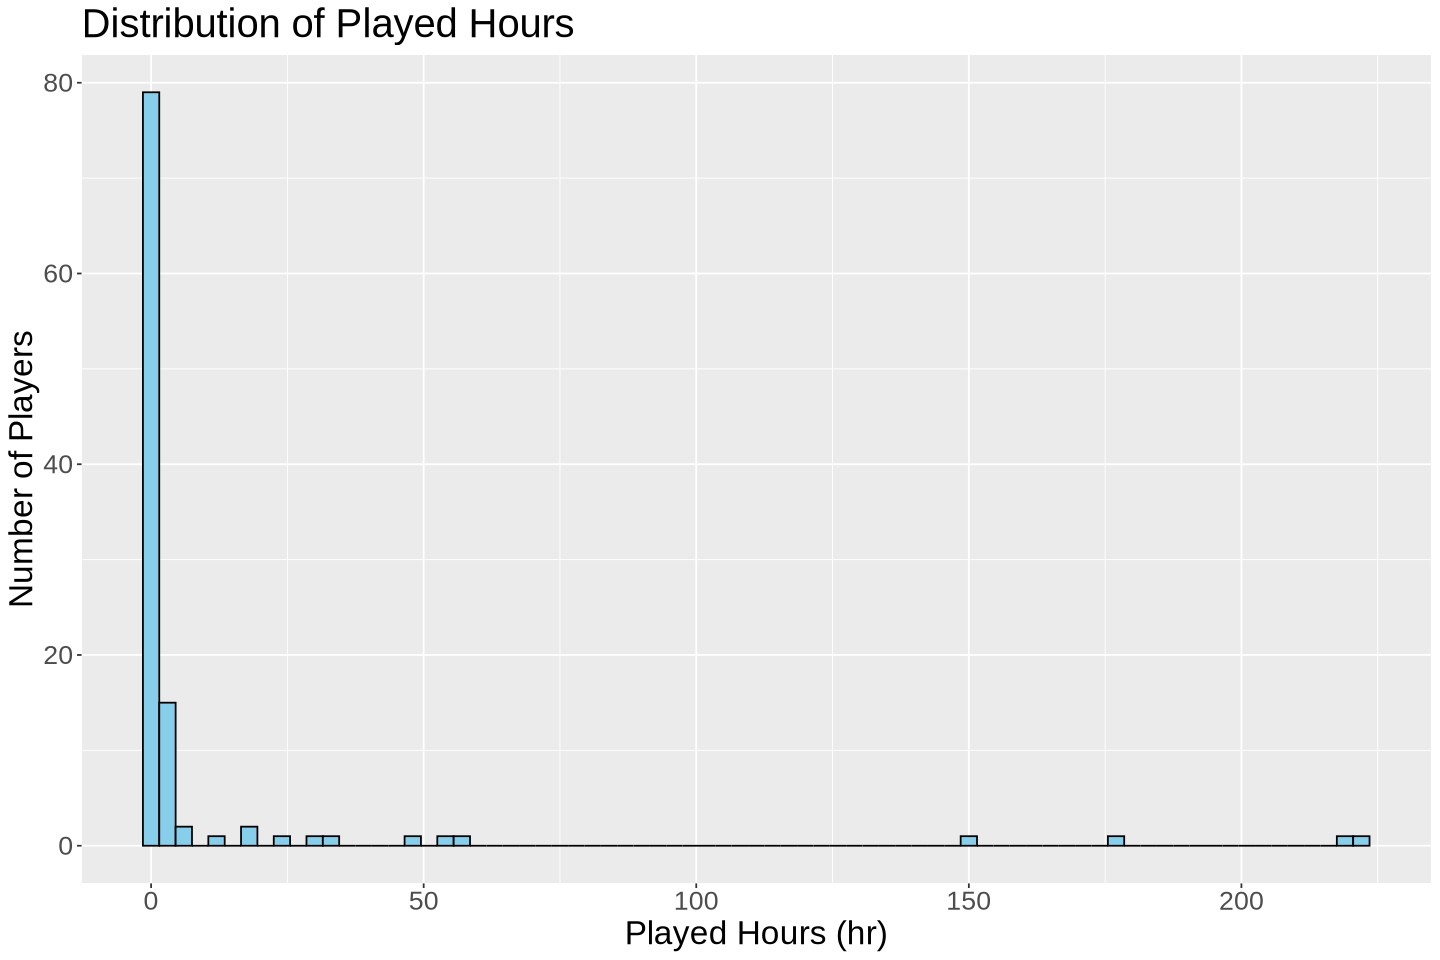

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_plot <- players_ds |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_plot

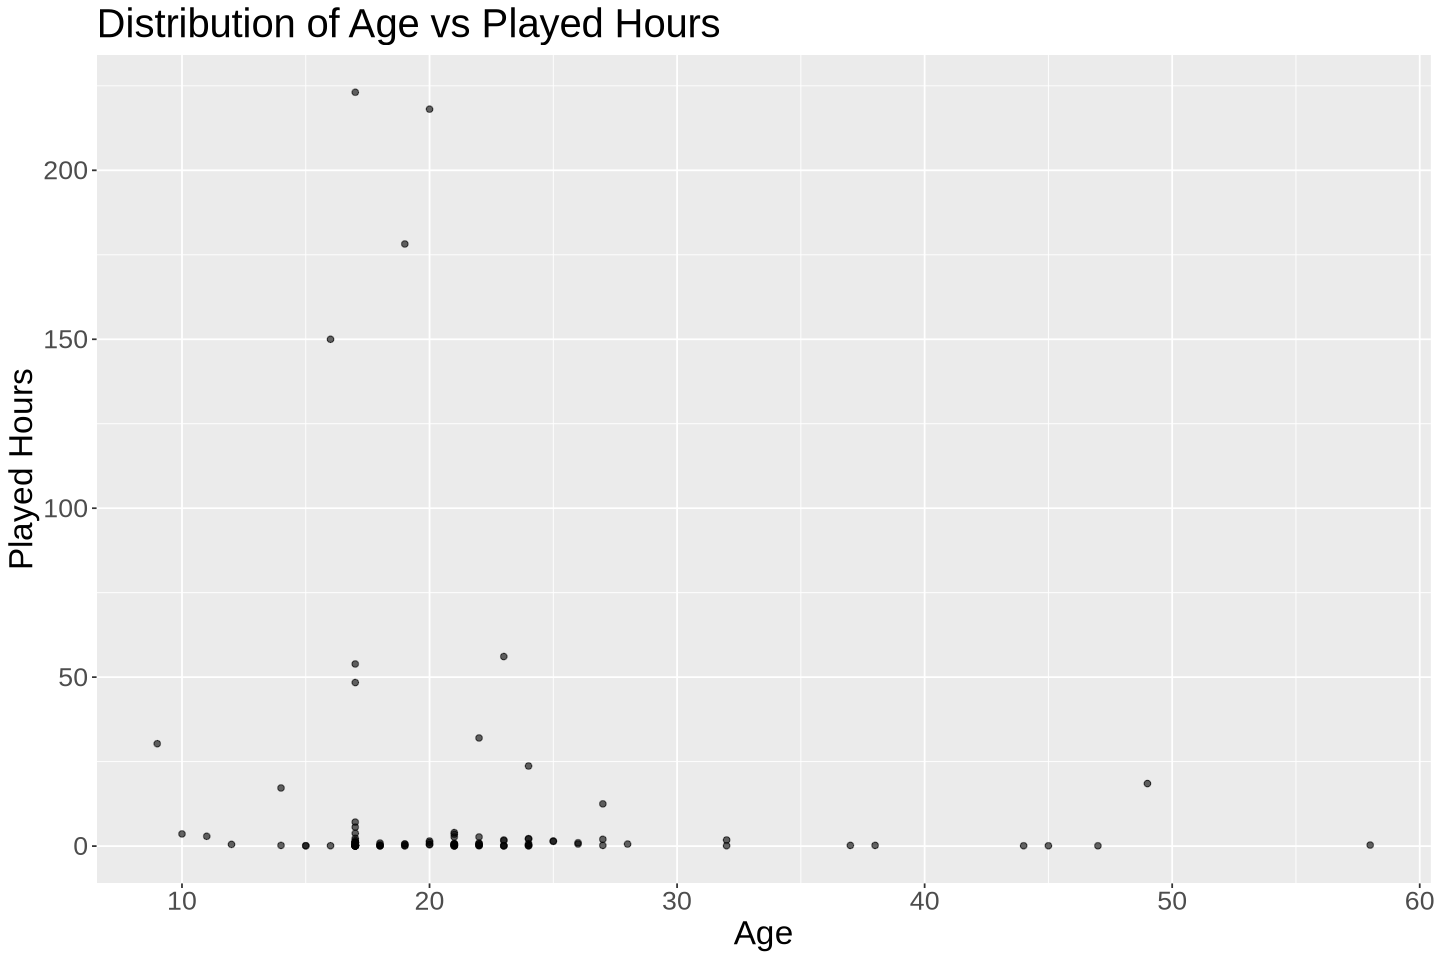

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_plot <- players_ds |> 
    ggplot(aes(x=age, y=played_hours)) +
    geom_point(alpha=0.6) +
    labs(
        x="Age",
        y="Played Hours",
        title="Distribution of Age vs Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_plot


We can see there are a few values which are abnormally high in the above graphic visual, played_hours > 150. We may choose to remove them, depending on our calculated RMSPE test error.

## Preparing a KNN-Regression Model


We have chosen to do a 75/25 split for the training and testing data. To calculate for the best K-value, we will first tune for K when creating a  model specification. Then, we will standardize our variables in the recipe. Finally, we will perform a 5 v-fold cross validation with a grid of numbers of neighbors ranging from 1-20, filter for RMSPE, then arranging to find the smallest RMSPE that would give us the best K value. 

In [9]:
set.seed(2000)
players_split <- initial_split(players_ds, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)
     

set.seed(1234)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ age + experience, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
     

set.seed(1234)
players_vfold <- vfold_cv(
    players_training,
    v=5,
    strata=played_hours
)
players_workflow <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe)
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
set.seed(2019)
gridvals <- tibble(neighbors = seq(1, 20, by=1))

players_results <- players_workflow |>
    tune_grid(
        resamples = players_vfold,
        grid = gridvals
    ) |>
    collect_metrics()
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,64.58449661,5,9.52058004,Preprocessor1_Model01
1,rsq,standard,0.18424159,5,0.11202916,Preprocessor1_Model01
2,rmse,standard,51.03663815,5,8.87410841,Preprocessor1_Model02
2,rsq,standard,0.07095750,5,0.06141906,Preprocessor1_Model02
3,rmse,standard,51.67543171,5,6.83547597,Preprocessor1_Model03
3,rsq,standard,0.04590137,5,0.03294643,Preprocessor1_Model03
4,rmse,standard,43.54859165,5,7.77773813,Preprocessor1_Model04
4,rsq,standard,0.11927526,5,0.06929564,Preprocessor1_Model04
5,rmse,standard,40.54675343,5,7.75459095,Preprocessor1_Model05


In [11]:
set.seed(2020)
players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n=1) 
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,rmse,standard,37.75427,5,8.280137,Preprocessor1_Model15


The K-value that gives us the smallest RMSPE is K = 15. Using this new value, we create another model specification, re-use our old recipe, and combine them into a new workflow. Then, we use the model to predict `played_hours` based on each invidivual's characteristics, and compare them with the real `played_hours` values.

In [12]:
set.seed(1234)
k_min <- players_min |>
            pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                            set_engine("kknn") |>
                            set_mode("regression")

players_best_fit <- workflow() |>
                        add_recipe(players_recipe) |>
                        add_model(players_best_spec) |>
                        fit(data = players_training)

players_shared_test_results <- players_best_fit |> 
                       predict(players_testing) |>
                       bind_cols(players_testing)

players_summary <- players_shared_test_results |>
                       metrics(truth = played_hours, estimate = .pred) 
players_shared_test_results
players_summary

.pred,experience,age,played_hours
<dbl>,<dbl>,<dbl>,<dbl>
18.4666667,2,17,0.1
7.3066667,2,23,1.8
7.3066667,2,23,0.1
0.8666667,1,26,0.6
0.4800000,4,17,0.1
0.6000000,2,24,0.3
1.2466667,4,24,2.2
0.5866667,5,17,1.0
0.5866667,5,17,0.2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,17.246513841
rsq,standard,0.004888932
mae,standard,9.619285714


We notice that our model's RMSE is quite high. (talk about RSQ and MAE?). Perhaps the outliers noticed earlier when plotting a data played a role in skewing the data. To investigate this dataset further, we decide to remove the outliers visually seen in the `played_hours` distribution, and recreate the model by calculating for the best K value again, and then predicting them in a workflow:

## Removing the Outliers visually seen in the played_hours distribution

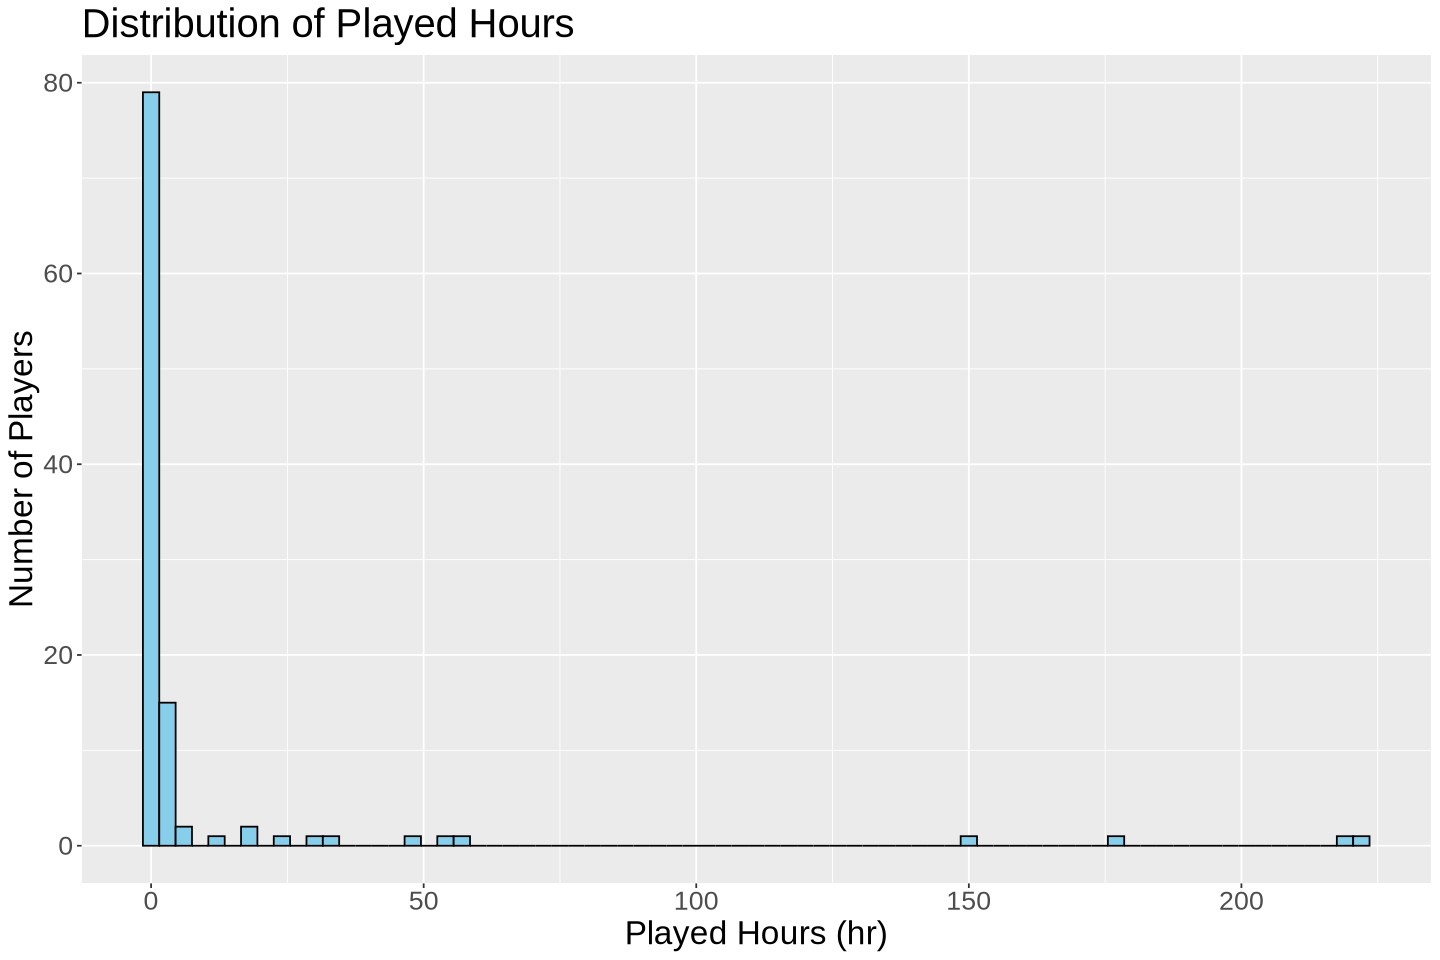

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_plot <- players_ds |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_plot

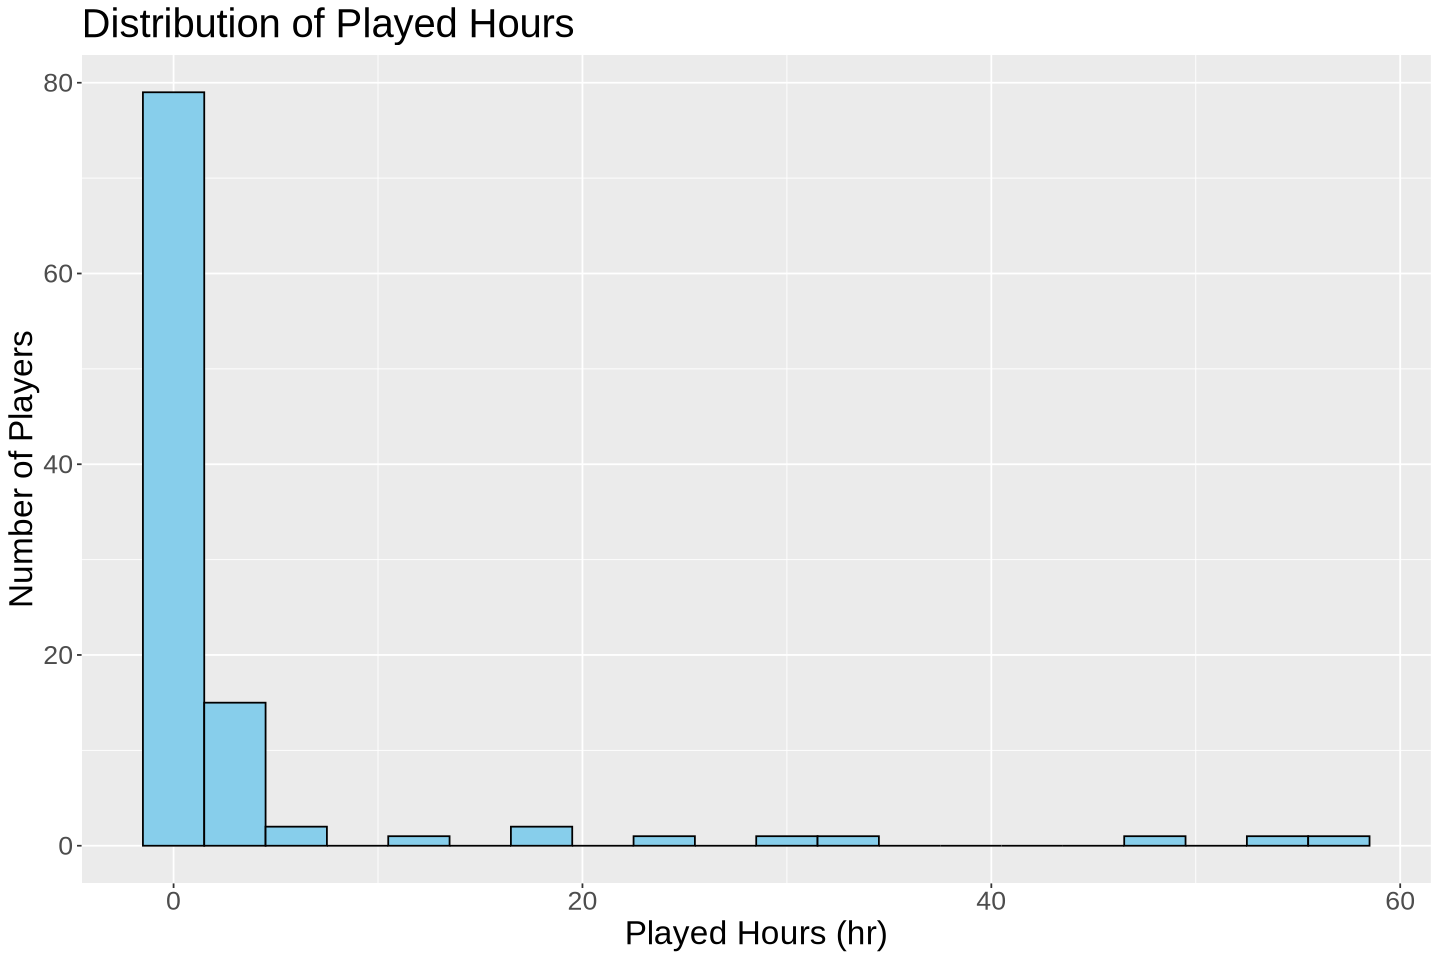

In [14]:
players_no_outliers <- players_ds |>
    filter(played_hours < 150)

options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_no_outliers_plot <- players_no_outliers |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_no_outliers_plot
     

In [15]:
set.seed(2000)
players_no_outliers_split <- initial_split(players_no_outliers, prop = 0.75, strata = played_hours)
players_no_outliers_training <- training(players_no_outliers_split)
players_no_outliers_testing <- testing(players_no_outliers_split)

In [16]:
set.seed(1234)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ age + experience, data = players_no_outliers_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

In [17]:

set.seed(1234)
players_vfold <- vfold_cv(
    players_no_outliers_training,
    v=5,
    strata=played_hours
)
players_workflow <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe)
players_workflow

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [18]:
set.seed(2019)
gridvals <- tibble(neighbors = seq(1, 10, by=1))

players_results <- players_workflow |>
    tune_grid(
        resamples = players_vfold,
        grid = gridvals
    ) |>
    collect_metrics()
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,12.01092698,5,3.19098859,Preprocessor1_Model01
1,rsq,standard,0.13129718,5,0.11038457,Preprocessor1_Model01
2,rmse,standard,10.81156834,5,2.90684322,Preprocessor1_Model02
2,rsq,standard,0.02713158,5,0.01156549,Preprocessor1_Model02
3,rmse,standard,11.79815111,5,2.40964681,Preprocessor1_Model03
3,rsq,standard,0.04173223,5,0.01621633,Preprocessor1_Model03
4,rmse,standard,11.39852494,5,2.59361855,Preprocessor1_Model04
4,rsq,standard,0.02840031,5,0.01407311,Preprocessor1_Model04
5,rmse,standard,10.39746731,5,2.49999752,Preprocessor1_Model05


In [19]:
set.seed(2020)
players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n=1) 
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,9.403281,5,2.401362,Preprocessor1_Model07


With no outliers, the K value that yields the smallest RMSPE is K = 7. We create a new workflow, then predict new results:

In [20]:
set.seed(1234)
k_min <- players_min |>
            pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                            set_engine("kknn") |>
                            set_mode("regression")

players_best_fit <- workflow() |>
                        add_recipe(players_recipe) |>
                        add_model(players_best_spec) |>
                        fit(data = players_no_outliers_training)

players_shared_test_results <- players_best_fit |> 
                       predict(players_no_outliers_testing) |>
                       bind_cols(players_no_outliers_testing)

players_summary <- players_shared_test_results |>
                       metrics(truth = played_hours, estimate = .pred) 
players_shared_test_results
players_summary

.pred,experience,age,played_hours
<dbl>,<dbl>,<dbl>,<dbl>
0.6857143,5,9,30.3
14.7857143,2,17,0.1
12.9142857,2,23,1.8
12.9142857,2,23,0.1
4.1714286,1,26,0.6
2.7571429,4,25,1.4
0.7571429,4,17,0.1
12.9857143,2,24,0.3
0.8857143,4,21,0.6


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.8577904
rsq,standard,0.0504153
mae,standard,6.4703704


Although our model's test error is smaller than our model with the outliers, the error is still significantly high, especially as most of the `played_hours` range from 0.1 - 2.5 hours, meaning that our error is likely larger than the mean hours played. Therefore, our model is not effective at predicting `played_hours` based on age and experience level. 

In [21]:
head(players_ds)
tail(players_ds)

experience,age,played_hours
<dbl>,<dbl>,<dbl>
5,9,30.3
4,17,3.8
2,21,0.7
3,21,0.1
2,47,0.1
4,23,1.6


experience,age,played_hours
<dbl>,<dbl>,<dbl>
2,22,32.0
5,17,1.7
3,18,0.1
4,44,0.1
4,22,0.3
2,17,2.3


In [22]:
players_unordered <- players_ds |>
    mutate(experience = as_factor(experience)) |>
    select(experience, played_hours, age) |>
    recipe() |>
    step_dummy(experience) |>
    prep()
players_unordered <- bake(players_unordered, new_data=NULL)
head(players_unordered)

played_hours,age,experience_X2,experience_X3,experience_X4,experience_X5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.3,9,0,0,0,1
3.8,17,0,0,1,0
0.7,21,1,0,0,0
0.1,21,0,1,0,0
0.1,47,1,0,0,0
1.6,23,0,0,1,0


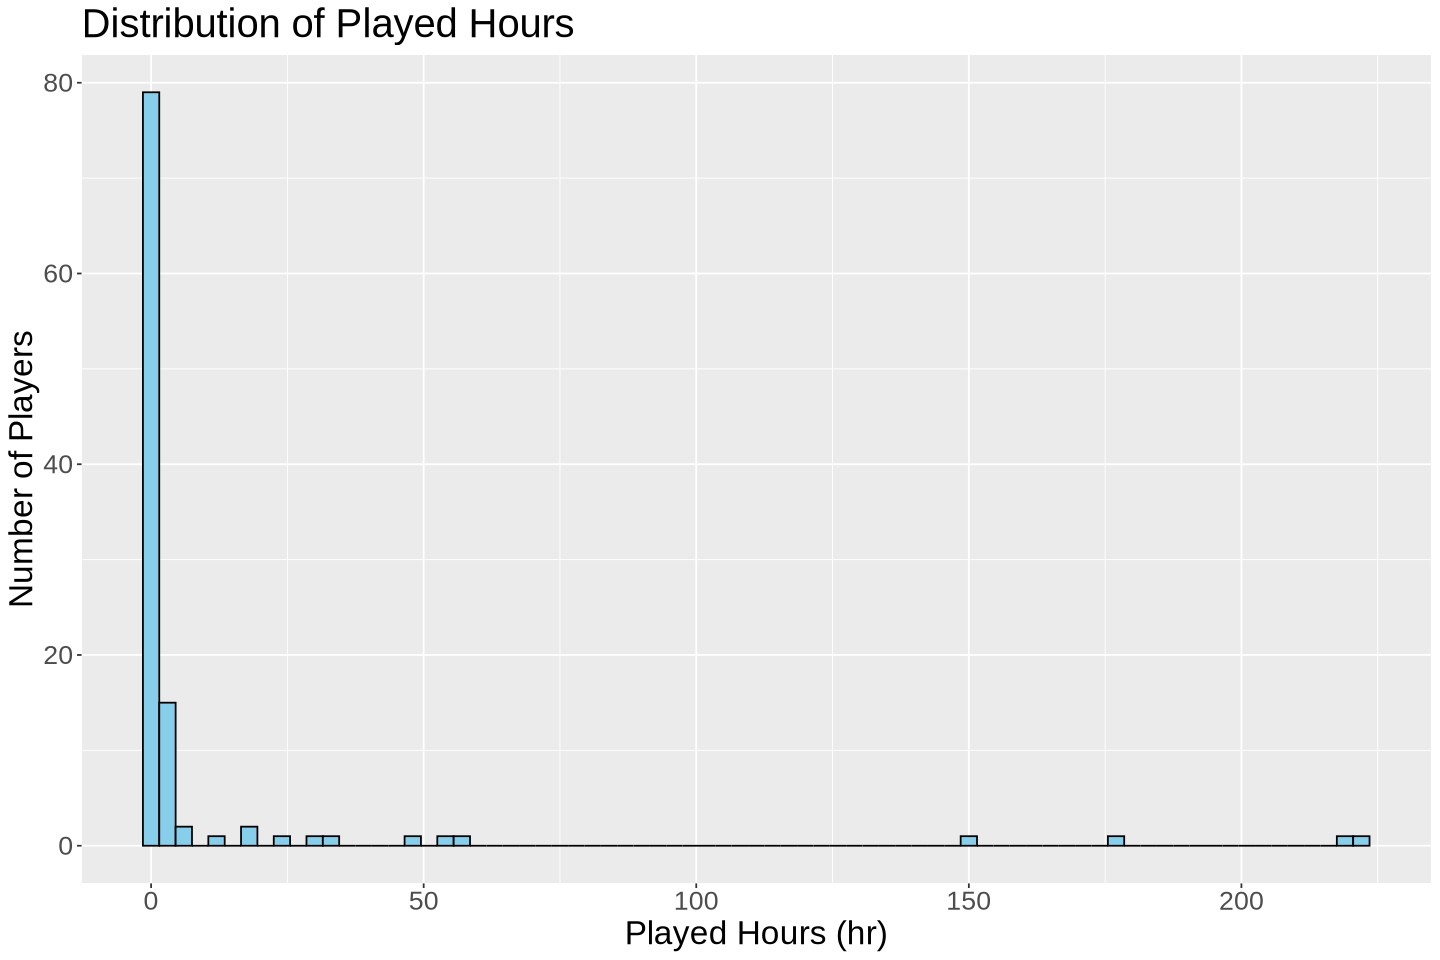

In [23]:
options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_plot <- players_unordered |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_plot

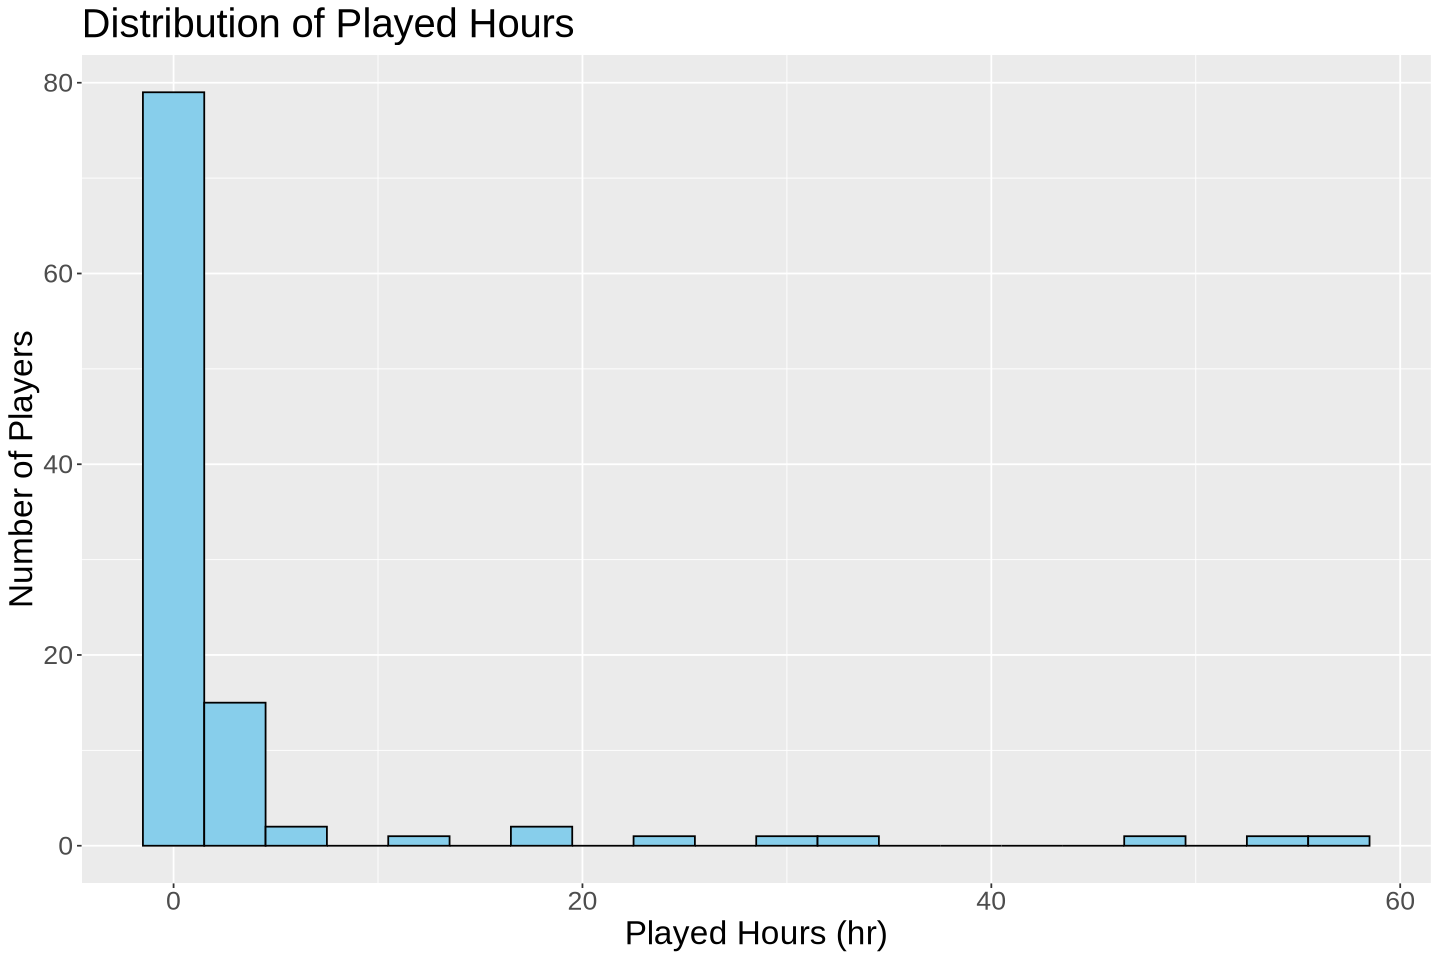

In [24]:
players_unordered_no_outliers <- players_unordered |>
    filter(played_hours < 150)

options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_unordered_no_outliers_plot <- players_unordered_no_outliers |> 
    ggplot(aes(x=played_hours)) +
    geom_histogram(binwidth=3, fill = "skyblue", color = "black") +
    labs(
        x="Played Hours (hr)",
        y="Number of Players",
        title="Distribution of Played Hours"
    ) +
    theme(text = element_text(size=20))
played_hours_unordered_no_outliers_plot

In [33]:
set.seed(2000)
players_unordered_no_outliers_split <- initial_split(players_unordered_no_outliers, prop = 0.75, strata = played_hours)
players_unordered_no_outliers_training <- training(players_unordered_no_outliers_split)
players_unordered_no_outliers_testing <- testing(players_unordered_no_outliers_split)
     

In [32]:
set.seed(1234)
set.seed(1234)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression")

players_recipe <- recipe(played_hours ~ age + experience_Veteran + 
                         experience_Amateur + experience_Regular + 
                         experience_Beginner, data = players_unordered_no_outliers_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
     

ERROR: [1m[33mError[39m in `recipe()`:[22m
[1m[22m[31m✖[39m Misspelled variable name or in-line functions detected.
[36mℹ[39m The following functions/misspellings were found: `experience_Veteran`,
  `experience_Amateur`, `experience_Regular`, and `experience_Beginner`.
[36mℹ[39m Use steps to do transformations instead.
[36mℹ[39m If your modeling engine uses special terms in formulas, pass that formula to
  workflows as a model formula (`?parsnip::model_formula()`).


In [28]:
set.seed(1234)
players_vfold <- vfold_cv(
    players_unordered_no_outliers_training,
    v=5,
    strata=played_hours
)
players_workflow <- workflow() |>
    add_model(players_spec) |>
    add_recipe(players_recipe)
players_workflow
     

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [30]:
set.seed(2020)
players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n=1) 
players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,9.403281,5,2.401362,Preprocessor1_Model07


In [31]:
set.seed(1234)
k_min <- players_min |>
            pull(neighbors)

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
                            set_engine("kknn") |>
                            set_mode("regression")

players_best_fit <- workflow() |>
                        add_recipe(players_recipe) |>
                        add_model(players_best_spec) |>
                        fit(data = players_unordered_no_outliers_training)

players_shared_test_results <- players_best_fit |> 
                       predict(players_unordered_no_outliers_testing) |>
                       bind_cols(players_unordered_no_outliers_testing)

players_summary <- players_shared_test_results |>
                       metrics(truth = played_hours, estimate = .pred) 
players_shared_test_results
players_summary

ERROR: [1m[33mError[39m in `recipes::prep()`:[22m
[1m[22m[33m![39m Not all variables in the recipe are present in the supplied training
  set: `experience`.


Some potential errors and unconsidered factors will be discussed in our discussion below.

## Discussion

## References

Johnston, Mindy. "Minecraft." Encyclopedia Britannica, 23 Apr. 2025, www.britannica.com/topic/Minecraft-electronic-game. Accessed 1 Dec. 2025.
